In [4]:
import numpy as np
import pandas as pd
import shutil

disks = ['C:\\', 'E:\\', 'F:\\']
l = len(disks)
a = []
for i in disks:
    a.append(shutil.disk_usage(i))

In [5]:
#в Gb
def formatSize(bytes):
    try:
        bytes = float(bytes)
        kb = bytes / 1024
    except:
        return "Error"
    if kb >= 1024:
        M = kb / 1024
        if M >= 1024:
            G = M / 1024
            return round(G)
        else:
            return round(M * 0.001, 2)
    else:
        return  round(kb * 0.000001, 2)

In [6]:
total = [formatSize(a[i][0]) for i in range(0,l)]
used = [formatSize(a[i][1]) for i in range(0,l)]
free = [formatSize(a[i][2]) for i in range(0,l)]
#print("disks:    ",disks)
#print("Total Gb: ", total)
#print("Used Gb:  ", used)
#print("Free Gb:  ", free)

In [7]:
space_df = pd.DataFrame([disks, total, used, free], index=['disks', 'total', 'used', 'free', ] ).T
space_df

,disks,total,used,free
0,C:\,231,212,19
1,E:\,1000,582,418
2,F:\,662,385,278


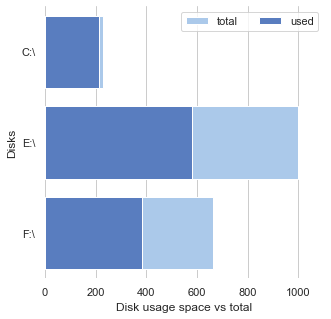

In [313]:
#Построим график, на котором видно соотношение свободного пространства к занятому
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Load the example car crash dataset
sort_space = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="disks", data=space_df,
            label="total", color="b")

sns.set_color_codes("muted")
sns.barplot(x="used", y="disks", data=space_df,
            label="used", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 1100), ylabel="Disks",
       xlabel="Disk usage space vs total")
sns.despine(left=True, bottom=True)

([<matplotlib.patches.Wedge at 0x261d19f77b8>,
 [Text(-0.07811861447430153, 1.0972226219289392, ''),
  Text(0.07811861447430139, -1.0972226219289392, '')])

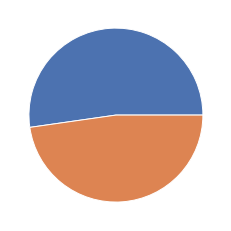

In [81]:
from matplotlib.pyplot import pie

pie([space_df['total'][0], space_df['used'][0]])

([<matplotlib.patches.Wedge at 0x261d1f7ca20>,
 [Text(-0.443548923158026, 1.0066103281634635, ''),
  Text(0.4435489231580259, -1.0066103281634635, '')])

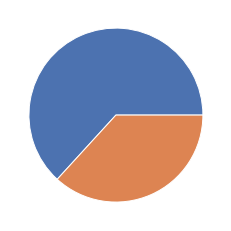

In [83]:
pie([space_df['total'][1], space_df['used'][1]])

([<matplotlib.patches.Wedge at 0x261d2092710>,
 [Text(-0.4440911482980337, 1.0063712297176097, ''),
  Text(0.4440912425213062, -1.0063711881387913, '')])

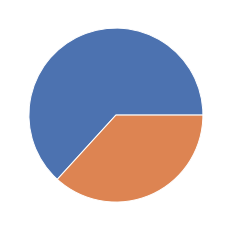

In [84]:
pie([space_df['total'][2], space_df['used'][2]])

In [22]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in c:\users\serg\anaconda3\lib\site-packages (0.11.0)


In [1]:
sns.__version__

NameError: name 'sns' is not defined

In [198]:
a = []
for i in disks:
    a.append(formatSize(shutil.disk_usage(i)))

In [11]:
import os
import stat
from datetime import datetime, date

def print_dirs_recursively(root_dir):
    os.chmod(root_dir, stat.S_IWRITE)
    root_dir = os.path.abspath(root_dir)
    print(root_dir)

    for item in os.listdir(root_dir):
        item_full_path = os.path.join(root_dir, item)
        if os.path.isdir(item_full_path):
            print_dirs_recursively(item_full_path)

In [135]:
#print_dirs_recursively(disks[0])

In [136]:
dir_path='C:\\Users\\Serg\\Documents'
fill = []

In [137]:
import pathlib
for filepath in pathlib.Path(dir_path).glob('**/*'):
    fill.append(filepath.absolute())

In [139]:
import pathlib
file_name_list, get_file_size, file_names = [], [], []
file_ext, getCTime, getMTime = [], [], []
for filepath in pathlib.Path(dir_path).glob('**/*'):
    #print(os.path.isfile(os.path.basename(filepath)))
    if os.path.isfile(filepath.absolute()):
        #get file name
        file_names.append(os.path.basename(filepath))
        
        #get filepath
        test_list.append(os.path.abspath(filepath.absolute()))
        
        #get file size
        get_file_size.append(os.path.getsize(filepath.absolute()))
        
        #get file extension
        _, file_extension = os.path.splitext(filepath.absolute())
        file_ext.append(file_extension)  
        
        getCTime.append(os.path.getctime(filepath)) #Get creation time
        getMTime.append(os.path.getmtime(filepath)) # Get modified time
        

In [156]:
# get_file_size - результат в байтах
#  Переведем для простоты в Мегабайты (Mb)
file_sizes = [round(((x / 1024)/1024), 2) for x in get_file_size]

In [157]:
#Создаем список кортежей, для нашего будущего датафрейма
data_tuples = list(zip(test_list, file_names, file_ext, getCTime, getMTime, file_sizes))

# Check List

* ~конечно лучше, для простоты выдернуть названия файлов. выдернул~
* ~Выдернуть расширения, будет интересно посмотреть сколько каких файлов создается~
* ~необходимо добавить время создания файла~
* ~время его последней модификаций~

* hash файла? проверить копию файла и основной файл на совпадение ъешей, можно будет поискать дубли
* обернуть всё в функций, возможно в классы(?) для удобства и загрузки в крон.

* Копирование и сжатие файлов
* построение дашборда (?)

In [158]:
#Сконверуем в датафрейм
df = pd.DataFrame(data_tuples, columns=['FullPath', 'FileName',
                                              'FileExt', 'Creation time', 'Modified time', 'Size', ])

#взглянем на наш датафрейм, с ним будем работать постепенно добавляя данные
#время в unixtime
df.head()

,FullPath,FileName,FileExt,Creation time,Modified time,Size
0,C:\Users\Serg\Documents\123.pcapng,123.pcapng,.pcapng,1.556492e+09,1.556492e+09,202.18
1,C:\Users\Serg\Documents\desktop.ini,desktop.ini,.ini,1.553546e+09,1.599918e+09,0.00
2,C:\Users\Serg\Documents\hotspot2.zip,hotspot2.zip,.zip,1.558729e+09,1.558729e+09,0.07
3,C:\Users\Serg\Documents\test.jpg,test.jpg,.jpg,1.599601e+09,1.599601e+09,0.05
4,C:\Users\Serg\Documents\Untitled.ipynb,Untitled.ipynb,.ipynb,1.570129e+09,1.570129e+09,0.00


In [314]:
df.FileExt.value_counts()[:20]

.py           1778
.pyc          1699
               686
.jpg           174
.загружено      70
.pyd            59
.css            39
.txt            39
.png            32
.csv            29
.h              27
.npy            24
.exe            24
.xml            22
.vmdk           17
.f90            15
.trec           13
.gz             13
.pkl            12
.js             11
Name: FileExt, dtype: int64

In [302]:
df[df.FileExt == '.загружено']

,FullPath,FileName,FileExt,Creation time,Modified time,Size,Creation time formatted,Modified time formatted,Dates,Creation Date,Creation Time,Modified Date,Modified Time
4635,C:\Users\Serg\Documents\ыыыы\Новости_files\028...,028bfab8c6a4c40a39372d9a5126be84.aecded3a49e6c...,.загружено,1.584063e+09,1.584063e+09,0.02,2020-03-13 01:29:12,2020-03-13 01:29:12,2020-03-13,2020-03-13,01:29:12,2020-03-13,01:29:12
4638,C:\Users\Serg\Documents\ыыыы\Новости_files\37d...,37d6fe1fee6fb6accf5867cbca2cda9c.784f9f81af390...,.загружено,1.584063e+09,1.584063e+09,0.18,2020-03-13 01:29:09,2020-03-13 01:29:09,2020-03-13,2020-03-13,01:29:09,2020-03-13,01:29:09
4646,C:\Users\Serg\Documents\ыыыы\Новости_files\479...,47935798a9fc8df8781f.js.загружено,.загружено,1.584063e+09,1.584063e+09,0.01,2020-03-13 01:29:18,2020-03-13 01:29:18,2020-03-13,2020-03-13,01:29:18,2020-03-13,01:29:18
4648,C:\Users\Serg\Documents\ыыыы\Новости_files\4ad...,4ad6740d9b54e18c214b1584b85679ea.f9996a8f7ac73...,.загружено,1.584063e+09,1.584063e+09,0.10,2020-03-13 01:29:10,2020-03-13 01:29:10,2020-03-13,2020-03-13,01:29:10,2020-03-13,01:29:10
4652,C:\Users\Serg\Documents\ыыыы\Новости_files\61d...,61d8b4ea43bdae5d02a3f103ba5a6da4.3e8b0df3175d4...,.загружено,1.584063e+09,1.584063e+09,0.02,2020-03-13 01:29:08,2020-03-13 01:29:08,2020-03-13,2020-03-13,01:29:08,2020-03-13,01:29:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,C:\Users\Serg\Documents\ыыыы\Новости_files\vid...,video_youtube.102f54c27b29a235da47.js.загружено,.загружено,1.584063e+09,1.584063e+09,0.02,2020-03-13 01:29:21,2020-03-13 01:29:21,2020-03-13,2020-03-13,01:29:21,2020-03-13,01:29:21
4896,C:\Users\Serg\Documents\ыыыы\Новости_files\voi...,voice_message_player.92746c027127b09badcf.js.з...,.загружено,1.584063e+09,1.584063e+09,0.02,2020-03-13 01:29:11,2020-03-13 01:29:11,2020-03-13,2020-03-13,01:29:11,2020-03-13,01:29:11
4899,C:\Users\Serg\Documents\ыыыы\Новости_files\wat...,watch.js.загружено,.загружено,1.584063e+09,1.584063e+09,0.13,2020-03-13 01:29:18,2020-03-13 01:29:18,2020-03-13,2020-03-13,01:29:18,2020-03-13,01:29:18
4902,C:\Users\Serg\Documents\ыыыы\Новости_files\wid...,wide_dd.js.загружено,.загружено,1.584063e+09,1.584063e+09,0.01,2020-03-13 01:29:11,2020-03-13 01:29:11,2020-03-13,2020-03-13,01:29:11,2020-03-13,01:29:11


In [250]:
def unixtimecovert(unixtime):
    return datetime.utcfromtimestamp(unixtime).strftime('%Y-%m-%d %H:%M:%S')


df['Creation time formatted'] = df['Creation time'].apply(unixtimecovert)
df['Modified time formatted'] = df['Creation time'].apply(unixtimecovert)


#df['Time'],df['Date']= df['Creation time'].apply(lambda x:x.time()),
#df['Creation time'].apply(lambda x:x.date())

#Разделим полученное столбец на столбец даты создания файла и времени создания файла
#подобное разделение позволит посмотреть на дни и время когда больше всего создается файлов
df['Creation Date'] = pd.to_datetime(df['Creation time formatted'], format='%Y-%m-%d').dt.date
df['Creation Time'] = pd.to_datetime(df['Creation time formatted'], format='%Y-%m-%d').dt.time

#Подобное преобразование проделаем с датоой изменения файла, чтобы лучше видеть
df['Modified Date'] = pd.to_datetime(df['Modified time formatted'], format='%Y-%m-%d').dt.date
df['Modified Time'] = pd.to_datetime(df['Modified time formatted'], format='%Y-%m-%d').dt.time

In [202]:
print(df['Dates'].min().strftime("%m/%d/%Y"))

In [209]:
d = df['Creation Date'][1]

25

In [207]:
df['Creation Date'][1] > datetime.datetime.strptime('20190506', "%Y%m%d")

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [274]:
datetime.strptime()

TypeError: strptime() takes exactly 2 arguments (0 given)

04/25/2018


In [306]:
#Сгруппируем файлы по дням создания
df['Dates'].value_counts()

2020-03-26    4425
2020-03-13     293
2019-05-24      32
2020-08-10      20
2020-07-23      19
              ... 
2019-06-05       1
2020-03-17       1
2020-09-07       1
2020-06-08       1
2020-06-13       1
Name: Dates, Length: 62, dtype: int64

In [304]:
type(df['Dates'][1])

datetime.date

datetime.date(2020, 9, 13)

In [297]:
#Вытащим  файлы, которые были созданы более 3 месяцев назад
# сравниваем дата создания фала больше ли сегодняшней даты - 90 дней
# обернем для простоты в функцию


##Подсчитываем, сколько дней прошло с даты создания файла
from datetime import datetime, timedelta

def count_days(date_for_count):    
    date_now = datetime.now().date()
    return (date_now - date_for_count).days


In [298]:
df['Count days']) = df

538

In [294]:
date_1 = df['Creation Date'][1]
date_now = datetime.now().date()
(date_now - date_1).days

538

In [288]:
from datetime import datetime

date_format = "%m/%d/%y"
datetime.strptime(df['Creation Date'][1], date_format)

TypeError: strptime() argument 1 must be str, not datetime.date

In [282]:
df[['Creation Date']]

TypeError: '(['Creation Date'], 1)' is an invalid key

KeyError: 1

In [148]:
#конвертируем UNIX-time в дату, время
from datetime import datetime

test = os.path.getctime(r'C:\Users\Serg\Documents\test.jpg')
print(datetime.utcfromtimestamp(test).strftime('%Y-%m-%d %H:%M:%S'))

2020-09-08 21:31:21


In [130]:
testData['FileName'].value_counts()[:30]

__init__.py                         214
__init__.cpython-37.pyc             206
conftest.py                          21
conftest.cpython-37.pyc              21
common.cpython-37.pyc                16
common.py                            16
setup.cpython-37.pyc                 14
setup.py                             14
test_constructors.cpython-37.pyc     12
test_constructors.py                 12
webdriver.cpython-37.pyc             11
top_level.txt                        11
utils.py                             11
webdriver.py                         11
utils.cpython-37.pyc                 11
compat.py                            10
test_indexing.py                      9
test_indexing.cpython-37.pyc          9
api.cpython-37.pyc                    9
api.py                                9
compat.cpython-37.pyc                 9
RECORD                                9
METADATA                              9
WHEEL                                 9
INSTALLER                             9


In [122]:
testData[testData['FileName'] == 'METADATA']

,FullPath,FileName,Size
311,C:\Users\Serg\Documents\backup\auto\venv\Lib\s...,METADATA,0.00
1159,C:\Users\Serg\Documents\backup\auto\venv\Lib\s...,METADATA,0.00
2908,C:\Users\Serg\Documents\backup\auto\venv\Lib\s...,METADATA,0.00
3472,C:\Users\Serg\Documents\backup\auto\venv\Lib\s...,METADATA,0.01
4091,C:\Users\Serg\Documents\backup\auto\venv\Lib\s...,METADATA,0.02
4275,C:\Users\Serg\Documents\backup\auto\venv\Lib\s...,METADATA,0.01
4281,C:\Users\Serg\Documents\backup\auto\venv\Lib\s...,METADATA,0.00
4333,C:\Users\Serg\Documents\backup\auto\venv\Lib\s...,METADATA,0.05
4411,C:\Users\Serg\Documents\backup\auto\venv\Lib\s...,METADATA,0.04


In [131]:
testData['Size'].value_counts() > 1.0;

In [132]:
userinfo = pwd.getpwuid(st['C:\Users\Serg\Documents\test.jpg'])

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-132-937ea0f27b56>, line 1)

In [134]:

fstat = os.stat(r'C:\Users\Serg\Documents\test.jpg')